#***1. Configuración del ambiente***

In [23]:
#Se definen las variables globales
global df_bitcoin, precio_actual, tendencia, media_bitcoin,  algoritmo_decision

In [24]:
#Importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [25]:
##Verificación importación de librerías
!python -V
print('------')
!pip show Pandas | grep 'Name\|Version'
print('------')
!pip show Numpy | grep 'Name\|Version'
print('------')
!pip show Matplotlib | grep 'Name\|Version'

Python 3.10.12
------
Name: pandas
Version: 1.5.3
------
Name: numpy
Version: 1.23.5
------
Name: matplotlib
Version: 3.7.1


#***2. Obtención de datos***

In [26]:
#Obtención valor Bitcoin de los últimos 7 días con intervalo de 5 minutos
import yfinance as yf
def importar_base_bitcoin():
  global df_bitcoin, precio_actual, tendencia, media_bitcoin,  algoritmo_decision
  msft = yf.Ticker("BTC-USD")
  df_bitcoin = msft.history(period="7d", interval='5m')

  return df_bitcoin


In [27]:
importar_base_bitcoin()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2023-10-27 00:00:00+00:00,34156.500000,34166.277344,34134.558594,34134.558594,0,0.0,0.0
2023-10-27 00:05:00+00:00,34142.019531,34142.019531,34113.355469,34113.355469,0,0.0,0.0
2023-10-27 00:10:00+00:00,34109.191406,34123.269531,34095.777344,34095.777344,0,0.0,0.0
2023-10-27 00:15:00+00:00,34113.597656,34113.597656,34072.480469,34072.480469,7481344,0.0,0.0
2023-10-27 00:20:00+00:00,34076.945312,34123.214844,34076.945312,34123.214844,612352,0.0,0.0
...,...,...,...,...,...,...,...
2023-11-02 11:25:00+00:00,35433.007812,35433.007812,35372.582031,35372.582031,26056704,0.0,0.0
2023-11-02 11:30:00+00:00,35373.171875,35399.046875,35370.527344,35393.871094,19691520,0.0,0.0
2023-11-02 11:35:00+00:00,35399.601562,35428.734375,35399.601562,35428.734375,12945408,0.0,0.0


In [28]:
#Obtención precio actual y tendencia
from bs4 import BeautifulSoup
import requests
def extraer_tendencias():
  global df_bitcoin, precio_actual, tendencia, media_bitcoin,  algoritmo_decision
  headers = {'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/118.0.0.0 Safari/537.36'}
  url = "https://coinmarketcap.com/"
  respuesta = requests.get(url, headers=headers)
  soup = BeautifulSoup(respuesta.content, features='lxml')
  respuesta = soup.find('div', {'class':["sc-a0353bbc-0 gDrtaY", "sc-a0353bbc-0 gDrtaY rise", "sc-a0353bbc-0 gDrtaY fall"]}).getText()
  precio_actual = float(respuesta.strip('$').replace(',', '').strip())
  tendencia = soup.find('span', {'class':["sc-d55c02b-0 iwhBxy", "sc-d55c02b-0 gUnzUB"]})
  tendencia = tendencia.find('span')
  tendencia = tendencia.get('class')
  tendencia = str (tendencia)

  if(tendencia == "['icon-Caret-up']"):
    tendencia = 'Alta'
  elif(tendencia == "['icon-Caret-down']"):
    tendencia = 'Baja'


In [29]:
extraer_tendencias()
print('Precio bitcoin: ', precio_actual)
print('Tendencia: ', tendencia)

Precio bitcoin:  35430.32
Tendencia:  Alta


#***3. Limpieza de datos***

In [30]:
df_bitcoin_limpio = df_bitcoin.copy()

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10,4))

<Axes: >

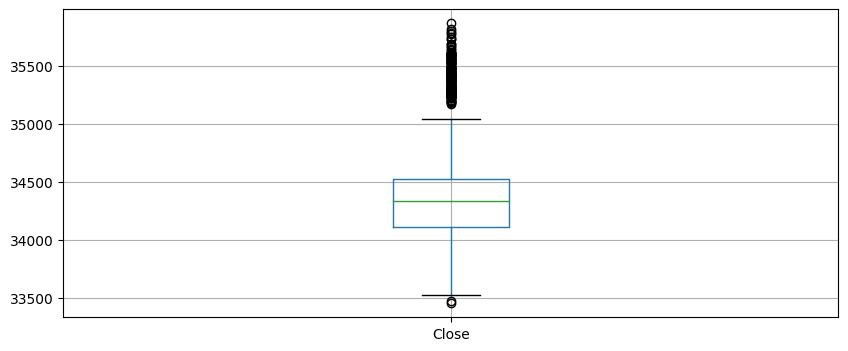

In [32]:
df_bitcoin.boxplot(['Close'])

<Axes: >

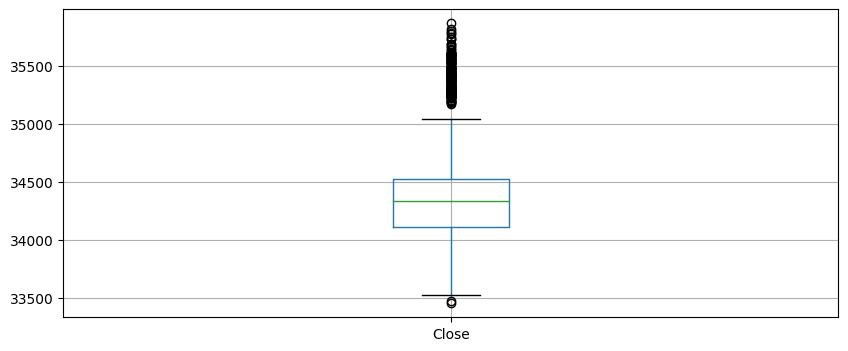

In [33]:
df_bitcoin_limpio.boxplot(['Close'])

In [34]:
valor = df_bitcoin_limpio['Close']

In [35]:
Q1 = valor.quantile(.25)
Q3 = valor.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [36]:
print(Q1)
print(Q3)
print(IIQ)
print(limite_inferior)
print(limite_superior)

34108.7431640625
34526.8876953125
418.14453125
33481.5263671875
35154.1044921875


In [37]:
seleccion = ((valor >= Q1) & (valor <= Q3))

In [38]:
df_bitcoin_limpio = df_bitcoin_limpio[seleccion]

<Axes: >

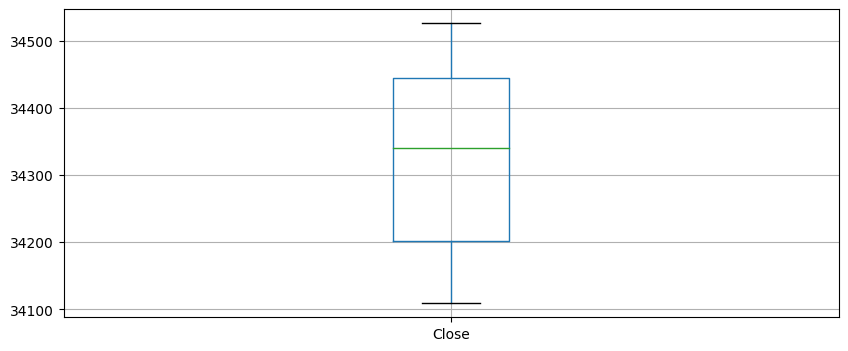

In [39]:
df_bitcoin_limpio.boxplot(['Close'])

In [40]:
#Se procede a limpiar el DataFrame
def limpieza_datos():
  global df_bitcoin, precio_actual, tendencia, media_bitcoin,  algoritmo_decision
  df_bitcoin_limpio = df_bitcoin.copy()
  df_bitcoin_limpio.drop_duplicates()
  df_bitcoin_limpio['Close'].dropna()
  df_bitcoin_limpio = df_bitcoin_limpio[df_bitcoin_limpio['Volume'] > 0]
  df_bitcoin_limpio = df_bitcoin_limpio[(df_bitcoin_limpio['Close'] >= Q1) & (df_bitcoin_limpio['Close'] <= Q3)]
  media_bitcoin = df_bitcoin_limpio['Close'].mean()

  return media_bitcoin

In [41]:
limpieza_datos()

34343.9233210637

In [42]:
media_bitcoin

34343.9233210637

#***4. Tomar decisiones***

In [43]:
#Se desarrolla el algoritmo para la toma de decisón por parte del Robot
def tomar_decisiones():
  global df_bitcoin, precio_actual, tendencia, media_bitcoin,  algoritmo_decision
  if((precio_actual >= limpieza_datos()) & (tendencia == 'Baja')):
    algoritmo_decision = 'Vender'
  elif((precio_actual < limpieza_datos()) & (tendencia == 'Alta')):
    algoritmo_decision = 'Comprar'
  else:
    algoritmo_decision = 'Esperar'

    return algoritmo_decision


#***5. Visualización***

In [44]:
#Se configura la interfaz gráfica para ver los resultados en pantalla
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(16,5))
def visualizacion():
  global df_bitcoin, precio_actual, tendencia, media_bitcoin,  algoritmo_decision
  df_bitcoin['Promedio'] = media_bitcoin
  plt.plot.xlabel = df_bitcoin.index
  x = plt.plot.xlabel
  plt.plot.ylabel = df_bitcoin.Close
  y = plt.plot.ylabel
  z = df_bitcoin.Promedio
  plt.plot(x,y,z)
  plt.title('Precio de Bitcoin')
  plt.annotate(f'Decisión: {algoritmo_decision}', xy=(df_bitcoin.index[-1], df_bitcoin['Close'].iloc[-1]), xytext=(df_bitcoin.index[-1], df_bitcoin['Close'].iloc[-1]),
              arrowprops=dict(facecolor='black', shrink=0.5), fontsize=12)
  plt.show()

#***6. Automatización***

In [45]:
from IPython.display import clear_output
import time

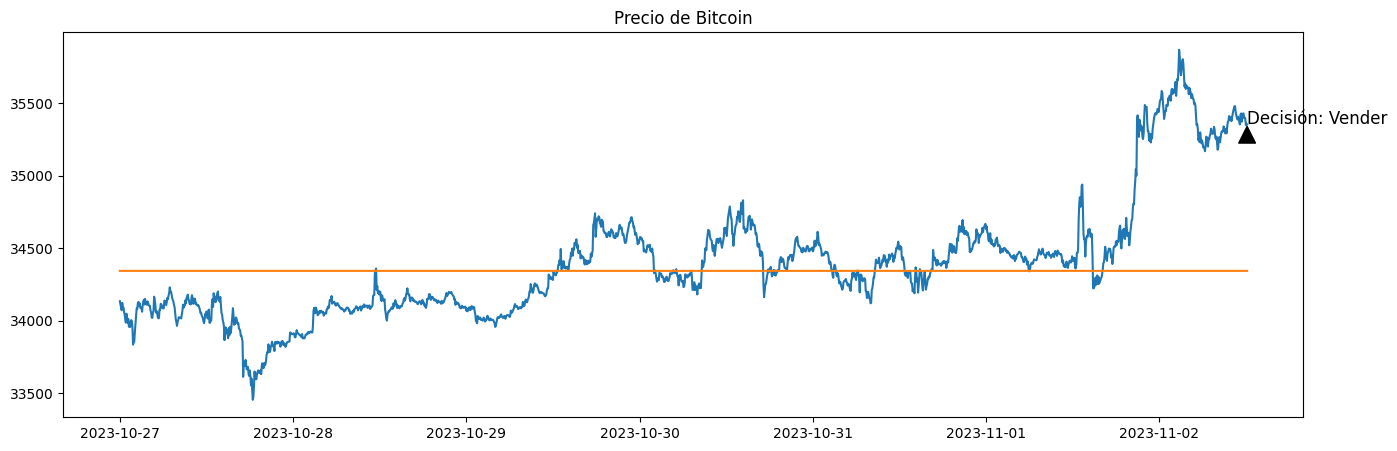

KeyboardInterrupt: ignored

In [46]:
#Se automatiza el proceso
while(True):
  clear_output()
  importar_base_bitcoin()
  extraer_tendencias()
  limpieza_datos()
  tomar_decisiones()
  visualizacion()
  time.sleep(300)